In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import re
import sklearn

In [136]:
datasett = pd.read_csv("all_kindle_revieww.csv")
datasett

,Unnamed: 0.1,Unnamed: 0,asin,helpful,rating,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,0,11539,B0033UV8HI,"[8, 10]",3,"Jace Rankin may be short, but he's nothing to ...","09 2, 2010",A3HHXRELK8BHQG,Ridley,Entertaining But Average,1283385600
1,1,5957,B002HJV4DE,"[1, 1]",5,Great short read. I didn't want to put it dow...,"10 8, 2013",A2RGNZ0TRF578I,Holly Butler,Terrific menage scenes!,1381190400
2,2,9146,B002ZG96I4,"[0, 0]",3,I'll start by saying this is the first of four...,"04 11, 2014",A3S0H2HV6U1I7F,Merissa,Snapdragon Alley,1397174400
3,3,7038,B002QHWOEU,"[1, 3]",3,Aggie is Angela Lansbury who carries pocketboo...,"07 5, 2014",AC4OQW3GZ919J,Cleargrace,very light murder cozy,1404518400
4,4,1776,B001A06VJ8,"[0, 1]",4,I did not expect this type of book to be in li...,"12 31, 2012",A3C9V987IQHOQD,Rjostler,Book,1356912000
...,...,...,...,...,...,...,...,...,...,...,...
11995,11995,2183,B001DUGORO,"[0, 0]",4,Valentine cupid is a vampire- Jena and Ian ano...,"02 28, 2014",A1OKS5Q1HD8WQC,lisa jon jung,jena,1393545600
11996,11996,6272,B002JCSFSQ,"[2, 2]",5,I have read all seven books in this series. Ap...,"05 16, 2011",AQRSPXLNEQAMA,TerryLP,Peacekeepers Series,1305504000
11997,11997,12483,B0035N1V7K,"[0, 1]",3,This book really just wasn't my cuppa. The si...,"07 26, 2013",A2T5QLT5VXOJAK,hwilson,a little creepy,1374796800
11998,11998,3640,B001W1XT40,"[1, 2]",1,"tried to use it to charge my kindle, it didn't...","09 17, 2013",A28MHD2DDY6DXB,"Allison A. Slater ""Gryphon50""",didn't work,1379376000


In [2]:
dataset = pd.read_csv("data.csv")
dataset


,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [3]:
dataset.iloc[7]

rating                                                              5
date                                                        31-Jul-18
variation                                            Charcoal Fabric 
verified_reviews    I think this is the 5th one I've purchased. I'...
feedback                                                            1
Name: 7, dtype: object

In [57]:
dataset.shape


(3150, 5)

In [58]:
dataset.keys()


Index(['rating', 'date', 'variation', 'verified_reviews', 'feedback'], dtype='object')

In [59]:
dataset.head(10)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
5,5,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1
6,3,31-Jul-18,Sandstone Fabric,"Without having a cellphone, I cannot use many ...",1
7,5,31-Jul-18,Charcoal Fabric,I think this is the 5th one I've purchased. I'...,1
8,5,30-Jul-18,Heather Gray Fabric,looks great,1
9,5,30-Jul-18,Heather Gray Fabric,Love it! I’ve listened to songs I haven’t hear...,1


In [60]:

dataset.shape

(3150, 5)

In [ ]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    12000 non-null  int64 
 1   Unnamed: 0      12000 non-null  int64 
 2   asin            12000 non-null  object
 3   helpful         12000 non-null  object
 4   rating          12000 non-null  int64 
 5   reviewText      12000 non-null  object
 6   reviewTime      12000 non-null  object
 7   reviewerID      12000 non-null  object
 8   reviewerName    11962 non-null  object
 9   summary         12000 non-null  object
 10  unixReviewTime  12000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.0+ MB


# Cleaning  Of Data Set
**bold text**

In [22]:
# Count the number of empty values in each column
dataset.isna().sum()

rating              0
verified_reviews    0
dtype: int64

In [62]:
dataset["variation"]

0       Charcoal Fabric 
1       Charcoal Fabric 
2         Walnut Finish 
3       Charcoal Fabric 
4       Charcoal Fabric 
              ...       
3145          Black  Dot
3146          Black  Dot
3147          Black  Dot
3148          White  Dot
3149          Black  Dot
Name: variation, Length: 3150, dtype: object

we don't need review name column for our model , so **we** rests it as it is

In [3]:
dataset = dataset.drop(columns = ["feedback"])
dataset = dataset.drop(columns = ["date","variation"])

In [4]:
dataset

,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"Sometimes while playing a game, you can answer..."
3,5,I have had a lot of fun with this thing. My 4 ...
4,5,Music
...,...,...
3145,5,"Perfect for kids, adults and everyone in betwe..."
3146,5,"Listening to music, searching locations, check..."
3147,5,"I do love these things, i have them running my..."
3148,5,Only complaint I have is that the sound qualit...


In [63]:
dataset.head()


,rating,verified_reviews
0,5,Love my Echo!
1,5,Loved it!
2,4,"Sometimes while playing a game, you can answer..."
3,5,I have had a lot of fun with this thing. My 4 ...
4,5,Music


In [64]:

dataset.isna().sum()

rating              0
verified_reviews    1
dtype: int64

In [65]:
dataset[dataset["verified_reviews"].isnull()]

,rating,verified_reviews
473,2,NaN


In [5]:
dataset.drop(index = [473] , inplace = True)

In [6]:
dataset.isna().sum()

rating              0
verified_reviews    0
dtype: int64

In [17]:
print(dataset.describe())

            rating
count  3149.000000
mean      4.463957
std       1.067773
min       1.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3149 entries, 0 to 3149
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3149 non-null   int64 
 1   verified_reviews  3149 non-null   object
dtypes: int64(1), object(1)
memory usage: 73.8+ KB


###  OUR DATASET IS PREPRED FOR ANALYSIS
###  Analyzing 'rating' column

In [19]:
print(f"Rating value count: \n{dataset['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


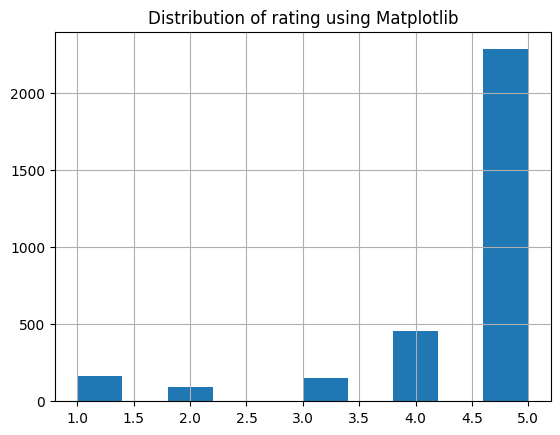

In [20]:
# PLotting Rating histogram

dataset.rating.hist()
plt.title("Distribution of rating using Matplotlib")
plt.show()

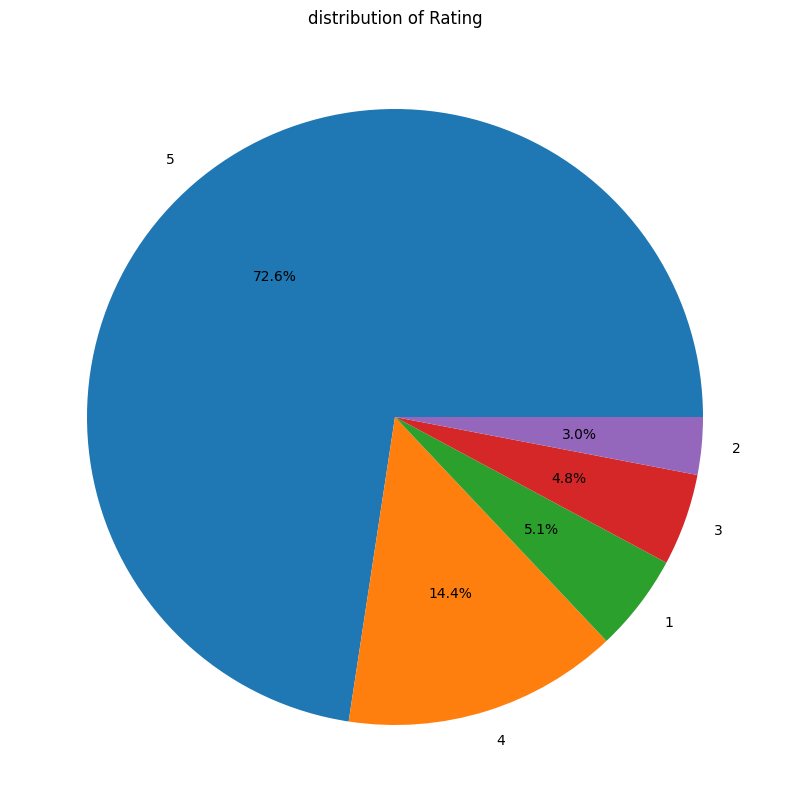

In [21]:
k = dataset["rating"].value_counts()
v = k.reset_index()
plt.figure(figsize=(12,10))
plt.pie(v["count"], labels = v["rating"], autopct = "%1.1f%%")
plt.title("distribution of Rating")
plt.show()


## Converting thr rating column as 0 - 1  value form

In [7]:
#converting rating to 0 and 1 from 1-5
dataset["rating"] = dataset["rating"].apply(lambda x: 1 if x < 3  else 0) # positive as 0 and negative as 1
dataset


,rating,verified_reviews
0,0,Love my Echo!
1,0,Loved it!
2,0,"Sometimes while playing a game, you can answer..."
3,0,I have had a lot of fun with this thing. My 4 ...
4,0,Music
...,...,...
3145,0,"Perfect for kids, adults and everyone in betwe..."
3146,0,"Listening to music, searching locations, check..."
3147,0,"I do love these things, i have them running my..."
3148,0,Only complaint I have is that the sound qualit...


In [8]:
import re
clean = re.compile("<>.*?")
re.sub(clean," ",dataset.iloc[2].verified_reviews)

'Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.'

In [9]:
# removing Punctuation
def clean(text):
  clean = re.compile("<>.*?")
  return re.sub(clean," ",text)

dataset["verified_reviews"] =dataset["verified_reviews"].apply(clean)
dataset

,rating,verified_reviews
0,0,Love my Echo!
1,0,Loved it!
2,0,"Sometimes while playing a game, you can answer..."
3,0,I have had a lot of fun with this thing. My 4 ...
4,0,Music
...,...,...
3145,0,"Perfect for kids, adults and everyone in betwe..."
3146,0,"Listening to music, searching locations, check..."
3147,0,"I do love these things, i have them running my..."
3148,0,Only complaint I have is that the sound qualit...


In [10]:
# lowering the text of the review
def covert_lower(text):
   return text.lower()
dataset["verified_reviews"] =dataset["verified_reviews"].apply(covert_lower)
dataset

,rating,verified_reviews
0,0,love my echo!
1,0,loved it!
2,0,"sometimes while playing a game, you can answer..."
3,0,i have had a lot of fun with this thing. my 4 ...
4,0,music
...,...,...
3145,0,"perfect for kids, adults and everyone in betwe..."
3146,0,"listening to music, searching locations, check..."
3147,0,"i do love these things, i have them running my..."
3148,0,only complaint i have is that the sound qualit...


In [11]:
# # function to remove special characters
def remove_special(text):
  x = ""
  for i in text:
      if i.isalnum():
          x = x + i
      else:
          x = x + " "
  return x


dataset["verified_reviews"] = dataset["verified_reviews"].apply(remove_special)
dataset

,rating,verified_reviews
0,0,love my echo
1,0,loved it
2,0,sometimes while playing a game you can answer...
3,0,i have had a lot of fun with this thing my 4 ...
4,0,music
...,...,...
3145,0,perfect for kids adults and everyone in betwe...
3146,0,listening to music searching locations check...
3147,0,i do love these things i have them running my...
3148,0,only complaint i have is that the sound qualit...


In [12]:
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
def remove_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words("english"):
            x.append(i)
    y = x[:]
    x.clear()
    return y
    


In [15]:
dataset["verified_reviews"] = dataset["verified_reviews"].apply(remove_stopwords)


In [16]:
dataset

,rating,verified_reviews
0,0,"[love, echo]"
1,0,[loved]
2,0,"[sometimes, playing, game, answer, question, c..."
3,0,"[lot, fun, thing, 4, yr, old, learns, dinosaur..."
4,0,[music]
...,...,...
3145,0,"[perfect, kids, adults, everyone]"
3146,0,"[listening, music, searching, locations, check..."
3147,0,"[love, things, running, entire, home, tv, ligh..."
3148,0,"[complaint, sound, quality, great, mostly, use..."


In [17]:
# perform strmming
from nltk.stem.porter import PorterStemmer


In [18]:
y = []  # Initialize a list outside the function definition

def stem_word(text):
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))  # Assuming `ps` is your stemmer object
    z = y[:]
    y.clear()
    return z


In [19]:
dataset["verified_reviews"] = dataset["verified_reviews"].apply(stem_word)

In [20]:
dataset

,rating,verified_reviews
0,0,"[love, echo]"
1,0,[love]
2,0,"[sometim, play, game, answer, question, correc..."
3,0,"[lot, fun, thing, 4, yr, old, learn, dinosaur,..."
4,0,[music]
...,...,...
3145,0,"[perfect, kid, adult, everyon]"
3146,0,"[listen, music, search, locat, check, time, lo..."
3147,0,"[love, thing, run, entir, home, tv, light, the..."
3148,0,"[complaint, sound, qualiti, great, mostli, use..."


In [21]:
# join back

def join_back(list_input):
    return " ".join(list_input)
    

In [22]:
dataset["verified_reviews"] = dataset["verified_reviews"].apply(join_back)

In [23]:
dataset

,rating,verified_reviews
0,0,love echo
1,0,love
2,0,sometim play game answer question correctli al...
3,0,lot fun thing 4 yr old learn dinosaur control ...
4,0,music
...,...,...
3145,0,perfect kid adult everyon
3146,0,listen music search locat check time look weat...
3147,0,love thing run entir home tv light thermostat ...
3148,0,complaint sound qualiti great mostli use comma...


In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 2500)

In [25]:
X = cv.fit_transform(dataset["verified_reviews"]).toarray()

In [73]:
X.shape

(3149, 2500)

In [92]:
X[0].max()

1

In [74]:
y = dataset.iloc[:,-1].values


In [94]:
dataset

,rating,verified_reviews
0,0,love echo
1,0,love
2,0,sometim play game answer question correctli al...
3,0,lot fun thing 4 yr old learn dinosaur control ...
4,0,music
...,...,...
3145,0,perfect kid adult everyon
3146,0,listen music search locat check time look weat...
3147,0,love thing run entir home tv light thermostat ...
3148,0,complaint sound qualiti great mostli use comma...


In [121]:
y.shape

(3149,)

In [95]:
y[0]

'love echo'

In [29]:
import os
import pickle
if not os.path.exists("Models"):
    os.makedirs("Models")


pickle.dump(cv, open("Models/countVectorizer.pkl", "wb"))


In [ ]:
# X,y
#Training set
#Test Set(already kwon the result)

In [133]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3 , random_state = 42)

In [103]:
X_train.shape

(2204, 2500)

In [98]:
X_test.shape

(945, 2500)

In [124]:
y_train.shape

(2204,)

In [125]:
y_test.shape


(945,)

In [126]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 18
X test max value: 10


In [77]:
y_train[0]

'far like bought music though sound pretti good'

In [104]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [53]:
#Saving the scaler model
pickle.dump(scaler, open('Models/scaler.pkl', 'wb'))

In [87]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [105]:
clf1 = GaussianNB()
clf2 = MultinomialNB()
clf3 = BernoulliNB()

In [106]:
clf1.fit(X_train_scl,y_train)
clf2.fit(X_train_scl,y_train)
clf3.fit(X_train_scl,y_train)


BernoulliNB()

In [107]:
y_pred1=clf1.predict(X_test_scl)
y_pred2=clf2.predict(X_test_scl)
y_pred3=clf3.predict(X_test_scl)

In [64]:
y_test.shape

(630,)

In [105]:
y_pred1.shape

(630,)

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
print("Gaussian",accuracy_score(y_test,y_pred1))
print("Multinomial",accuracy_score(y_test,y_pred1))
print("Bernaulli",accuracy_score(y_test,y_pred1))

Gaussian 0.4148148148148148
Multinomial 0.4148148148148148
Bernaulli 0.4148148148148148


In [82]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re
from sklearn.ensemble import RandomForestClassifier

In [80]:
model_xgb = XGBClassifier()


In [81]:
model_xgb.fit(X_train_scl,y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 1837 1838 1839], got [''
 '1 6 echo devic hous current deploy bedsid alarm clock use basic echo dot clock attach may occasion pull camera video audio qualiti screen qualiti realli appropri music watch video much time work well alarm clock seriou flaw particularli last one bed first wake seem like engin actual test bedroom 2 peopl differ schedul tri walk dark bedroom sleep wife wake say alexa set alarm 5am alexa repeat ok alarm set 5am good suppos could whisper fumbl volum button stupid plain simpl devic need brought 1990 simpl touch screen interfac ad set alarm know cumbersom interfac situat one set alarm alexa app phone thank pick phone set alarm use built alarm save step least engin allow alarm turn touch screen exampl wake minut earli cancel alarm without speak wake spous interfac use touch screen cancel alarm gone howev great separ snooz cancel button current touch snooz swipe cancel easi half awak snooz think cancel snooz alarm goe minut later amus longer sleep wife let know summon alexa turn bathroom light shower'
 '2nd echo dot work want bedroom par small blue tooth speaker last nite went sleep sound thunderstorm provid echo dot plan dot turn bedroom lamp receiv smart plug order'
 ...
 'ye met expect snooz alarm need work tap snooz swipe prompt dismiss without glass read often snooz one day must dismiss tomorrow alarm never went set mon thu fri need get earli appar indic alarm set would nice old alarm red light'
 'yet anoth exho home love' 'youtub']

In [93]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [94]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 0.9968239564428312
Testing Accuracy : 0.39894179894179893


In [110]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [111]:
print("Training Accuracy :", model_dt.score(X_train_scl, y_train))
print("Testing Accuracy :", model_dt.score(X_test_scl, y_test))

Training Accuracy : 0.9972776769509982
Testing Accuracy : 0.4148148148148148


In [135]:
pickle.dump(model_dt, open('Models/model_xgb.pkl', 'wb'))